In [11]:
! pip install mediapipe

In [12]:
import math

In [13]:
import cv2

In [14]:
from time import time

In [15]:
import matplotlib.pyplot as plt

In [16]:
import mediapipe as mp

In [17]:
import numpy as np

In [18]:
# Initialising the media pipe pose class
mp_pose=mp.solutions.pose

In [19]:
# Setting the pose function
pose=mp_pose.Pose(static_image_mode=True,min_detection_confidence=0.3,model_complexity=2)

In [20]:
''' static_image_mode is set to true means that the object will be detected from images only if want from videos then
set it to false
min_detection_confidence means how confident the model is in detecting a particular object
-- range - (0.0-1.0)
min_tracking_confidence means the confidence level at the time of tracking
model_complexity is how much complexity the model can take
-- possible values - 0,1,2
smooth_landmarks means that it smoothens out the points means what happens is that every time the image changes it's
position even a slighter change the points get re-adjusted which leads to so much flikkering so to avoid this
smooth_landmarks is used whose value is by default set to true
'''

" static_image_mode is set to true means that the object will be detected from images only if want from videos then\nset it to false\nmin_detection_confidence means how confident the model is in detecting a particular object \n-- range - (0.0-1.0)\nmin_tracking_confidence means the confidence level at the time of tracking\nmodel_complexity is how much complexity the model can take\n-- possible values - 0,1,2\nsmooth_landmarks means that it smoothens out the points means what happens is that every time the image changes it's \nposition even a slighter change the points get re-adjusted which leads to so much flikkering so to avoid this \nsmooth_landmarks is used whose value is by default set to true\n"

In [21]:
# read an image
image = cv2.imread("/content/Trikonasana.png")
if image is None:
    print("Error")

In [22]:
# Specify the size of image
plt.figure(figsize=[10,10])

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

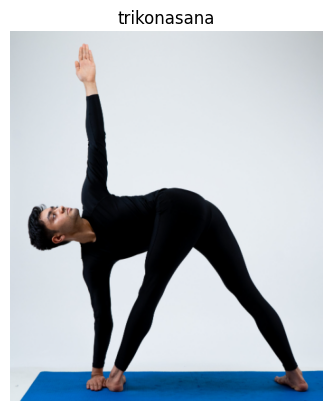

In [23]:
# Display the sample image
plt.title("trikonasana");plt.axis('off');plt.imshow(image[:,:,::-1]);plt.show()

In [24]:
# perform pose detection after converting the image to RGB because open cv reads the image in BGR
results=pose.process(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [25]:
if results.pose_landmarks:
# to get the value of first two landmarks only
    for i in range(1,2):
      print(f'{mp_pose.PoseLandmark(i).name}:\n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}')

LEFT_EYE_INNER:
x: 0.138145864
y: 0.482669264
z: -0.178584516
visibility: 0.9997558



In [26]:
# These values are normalised i.e there range is from 0 to 1 to get there exact values following code is there

In [27]:
# Get the height and width of the image
img_width=image.shape[1]
img_height=image.shape[0]

if results.pose_landmarks:
  # Get the height and width of the image
  for i in range(2):
    print(f'{mp_pose.PoseLandmark(i).name}:')
    print(f'x - {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].x * img_width}')
    print(f'y - {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].y * img_height}')
    print(f'z - {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].z * img_width}')
    print(f'visibility - {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].visibility}')


NOSE:
x - 77.54178151488304
y - 270.8526363968849
z - -106.47867920994759
visibility - 0.9999430179595947
LEFT_EYE_INNER:
x - 65.89557713270187
y - 272.70813420414925
z - -85.18481415510178
visibility - 0.9997557997703552


In [28]:
# To draw the landmarks on the image

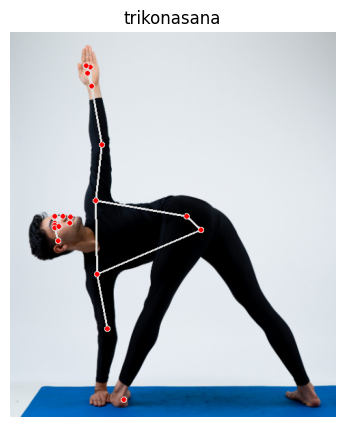

In [29]:
# We will first create a copy of the image
image_copy=image.copy()

# If any landmarks are found
if results.pose_landmarks:
  # Draw the landmarks
  mp.solutions.drawing_utils.draw_landmarks(image=image_copy,landmark_list=results.pose_landmarks,connections=mp_pose.POSE_CONNECTIONS)
  # Specify the size of image
  fig = plt.figure(figsize=[5,5])
  # Display the sample image
  plt.title("trikonasana");plt.axis('off');plt.imshow(image_copy[:,:,::-1]);plt.show()

In [30]:
''' landmark_list=results.pose_landmarks
It shows the list of landmarks detected in the picture
connections=mp_pose.POSE_CONNECTIONS
It shows the connections between the landmarks
'''

' landmark_list=results.pose_landmarks \nIt shows the list of landmarks detected in the picture\nconnections=mp_pose.POSE_CONNECTIONS\nIt shows the connections between the landmarks\n'

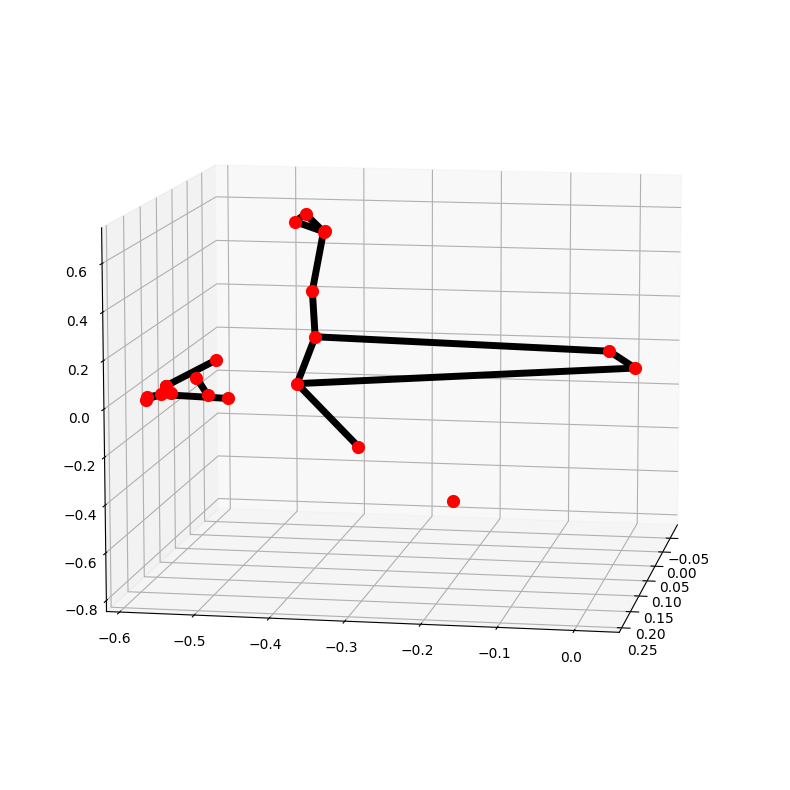

In [31]:
# To plot in 3D
mp.solutions.drawing_utils.plot_landmarks(results.pose_world_landmarks,mp_pose.POSE_CONNECTIONS)

In [32]:
# Creating pose detection function

In [33]:
mp_drawing=mp.solutions.drawing_utils

In [34]:
def detectPose(image,pose,display=True):
  image_rep=image.copy()
  image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  results=pose.process(image_rgb)
  height,width,_=image_rgb.shape
  landmarks=[]


  if results.pose_landmarks:
    mp_drawing.draw_landmarks(image=image_rep,landmark_list=results.pose_landmarks,connections=mp_pose.POSE_CONNECTIONS)
    for landmark in results.pose_landmarks.landmark:
      landmarks.append((int(landmark.x*width),int(landmark.y*height),(landmark.z*width)))
  if display:
    # Display the original input image and the resultant image
    plt.figure(figsize=[22,22])
    plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
    plt.subplot(122);plt.imshow(image_rep[:,:,::-1]);plt.title("Output Image");plt.axis('off');

    mp_drawing.plot_landmarks(results.pose_world_landmarks,mp_pose.POSE_CONNECTIONS)
  else:
    return image_rep,landmarks


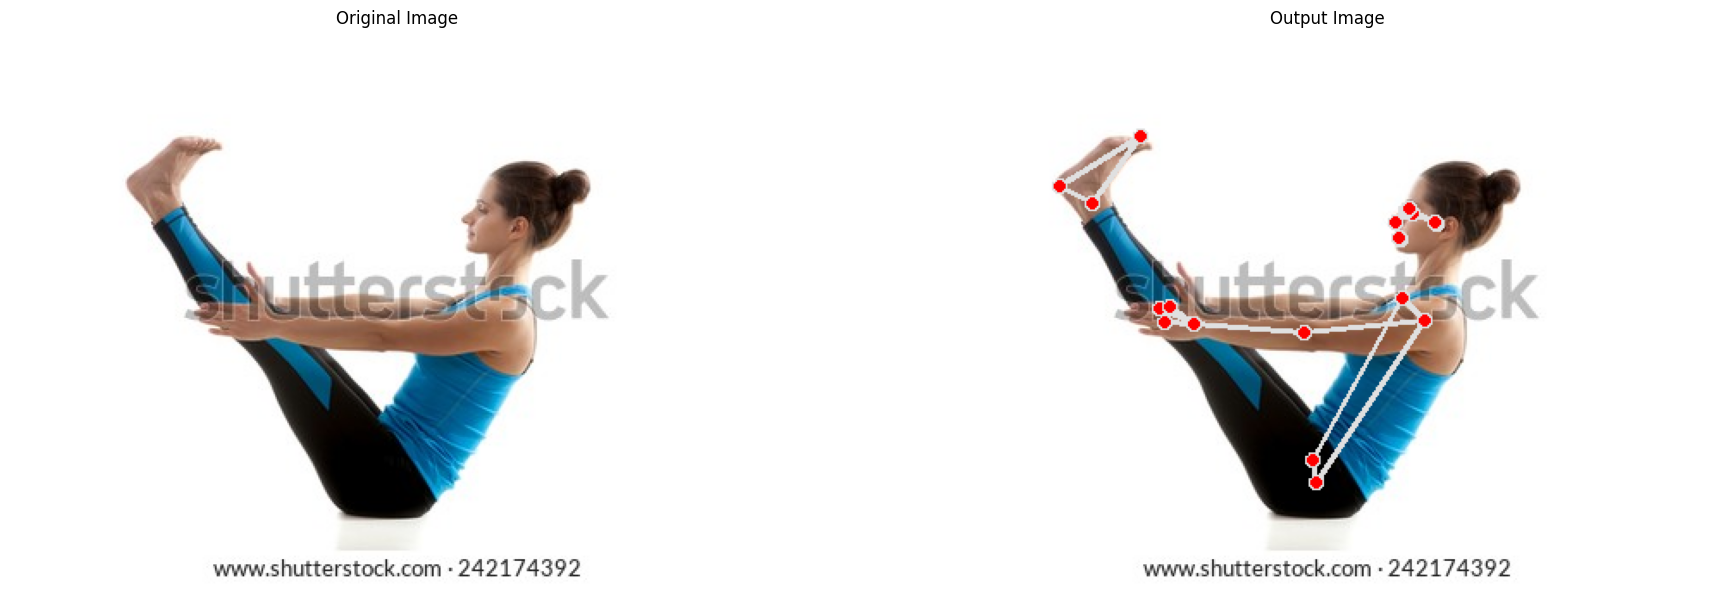

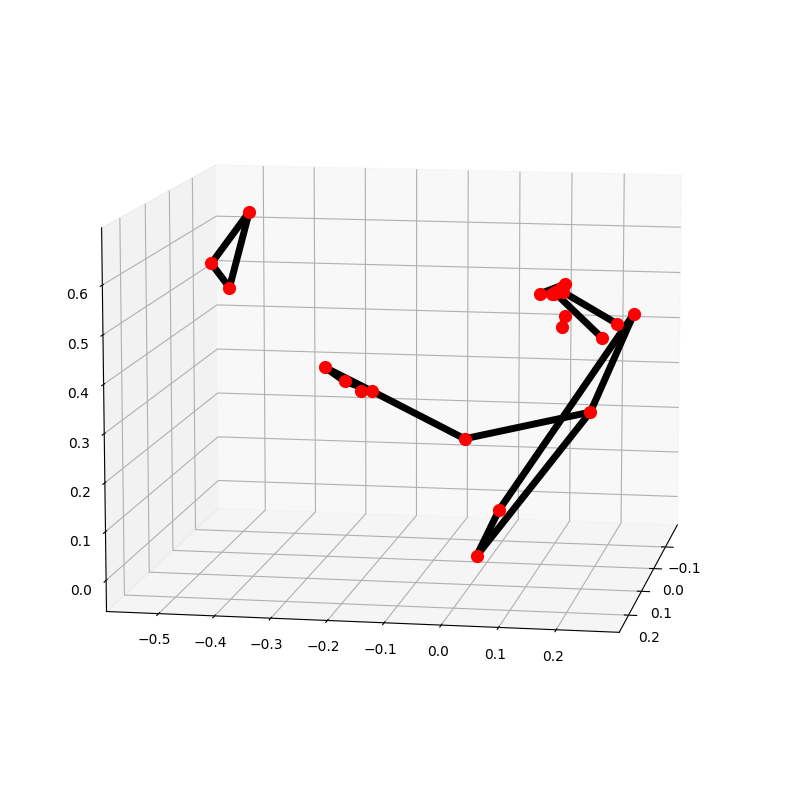

In [35]:
image=cv2.imread("/content/Boat_Pose_or_Paripurna_Navasana__image_281.jpg")
detectPose(image,pose,display=True)